<a href="https://colab.research.google.com/github/IshanThapa/Drug-activity-EDA/blob/main/Drug_activity_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1.Importing Required Libraries:

                            ********************************
                            ********************************
Introduction About the Data :
This study focuses on the development of a new QSAR model to predict the acute
toxicity of diverse chemicals, defined as LC50 96 hours, towards the fathead minnow
(Pimephales promelas). The model was developed keeping in mind the five OECD principles
in order to make it applicable for regulatory purposes within REACH. To this end,
attention was paid to the curation of the experimental data, which led to the definition of an
extended dataset consisting of 908 organic molecules. The model, based on six molecular
descriptors, used a similarity-based algorithm (kNN) to predict the toxicity.The dataset The goal is to predict toxicity of given compounds (Regression Analysis).

There are 6 independent variables :


CIC0 : unique identifier of each bonded Hydrogen atom.
SM1_Dz : Spectroscopic moment of order 1 using Barysz matrix.
GATS1i : 2D Geary autocorrelation descriptor.

NdssC : Number of unsaturated carbons in the molecule.
NdsCH : Number of Hydrogen atom bind to unsaturated carbons.
MLOGP : log of conc of octanol in water samples

Target variable:
LC50 : concentration of toxicant in sample

Dataset Source Link : https://www.kaggle.com/datasets/ishandutta/qsar-fish-toxicity-data-set/download?datasetVersionNumber=1
                            **************************************
                            **************************************

In [2]:
import numpy as np
import pandas as pd
import os
import random
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('A:/MY_PROJECTS/qsar/notebooks/data/qsar_fish_toxicity.csv',header=None,delimiter=';')
df.head()

,0,1,2,3,4,5,6
0,3.260,0.829,1.676,0,1,1.453,3.770
1,2.189,0.580,0.863,0,0,1.348,3.115
2,2.125,0.638,0.831,0,0,1.348,3.531
3,3.027,0.331,1.472,1,0,1.807,3.510
4,2.094,0.827,0.860,0,0,1.886,5.390


In [4]:
df.rename({0: 'CIC0', 1: 'SM1_Dz',2:'GATS1i',3:'NdsCH',4:'NdssC',5:'MLOGP',6:'LC50'}, axis=1, inplace=True)

In [5]:
df.head()

,CIC0,SM1_Dz,GATS1i,NdsCH,NdssC,MLOGP,LC50
0,3.260,0.829,1.676,0,1,1.453,3.770
1,2.189,0.580,0.863,0,0,1.348,3.115
2,2.125,0.638,0.831,0,0,1.348,3.531
3,3.027,0.331,1.472,1,0,1.807,3.510
4,2.094,0.827,0.860,0,0,1.886,5.390


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CIC0    908 non-null    float64
 1   SM1_Dz  908 non-null    float64
 2   GATS1i  908 non-null    float64
 3   NdsCH   908 non-null    int64  
 4   NdssC   908 non-null    int64  
 5   MLOGP   908 non-null    float64
 6   LC50    908 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 49.8 KB


In [7]:
for i in df.columns:
    if(len(df[i].unique()) < 10):
        print(i)
        print(df[i].value_counts())
        print("============================")

NdsCH
NdsCH
0    760
1    107
2     29
4      7
3      5
Name: count, dtype: int64
NdssC
NdssC
0    622
1    176
2     81
3     18
4      8
6      2
5      1
Name: count, dtype: int64


In [8]:
df.isnull().sum()

CIC0      0
SM1_Dz    0
GATS1i    0
NdsCH     0
NdssC     0
MLOGP     0
LC50      0
dtype: int64

In [9]:
num_features = [feature for feature in df.columns if df[feature].dtype !=  '0']
print('there are {} num_features : {}' .format(len(num_features) ,num_features))


there are 7 num_features : ['CIC0', 'SM1_Dz', 'GATS1i', 'NdsCH', 'NdssC', 'MLOGP', 'LC50']


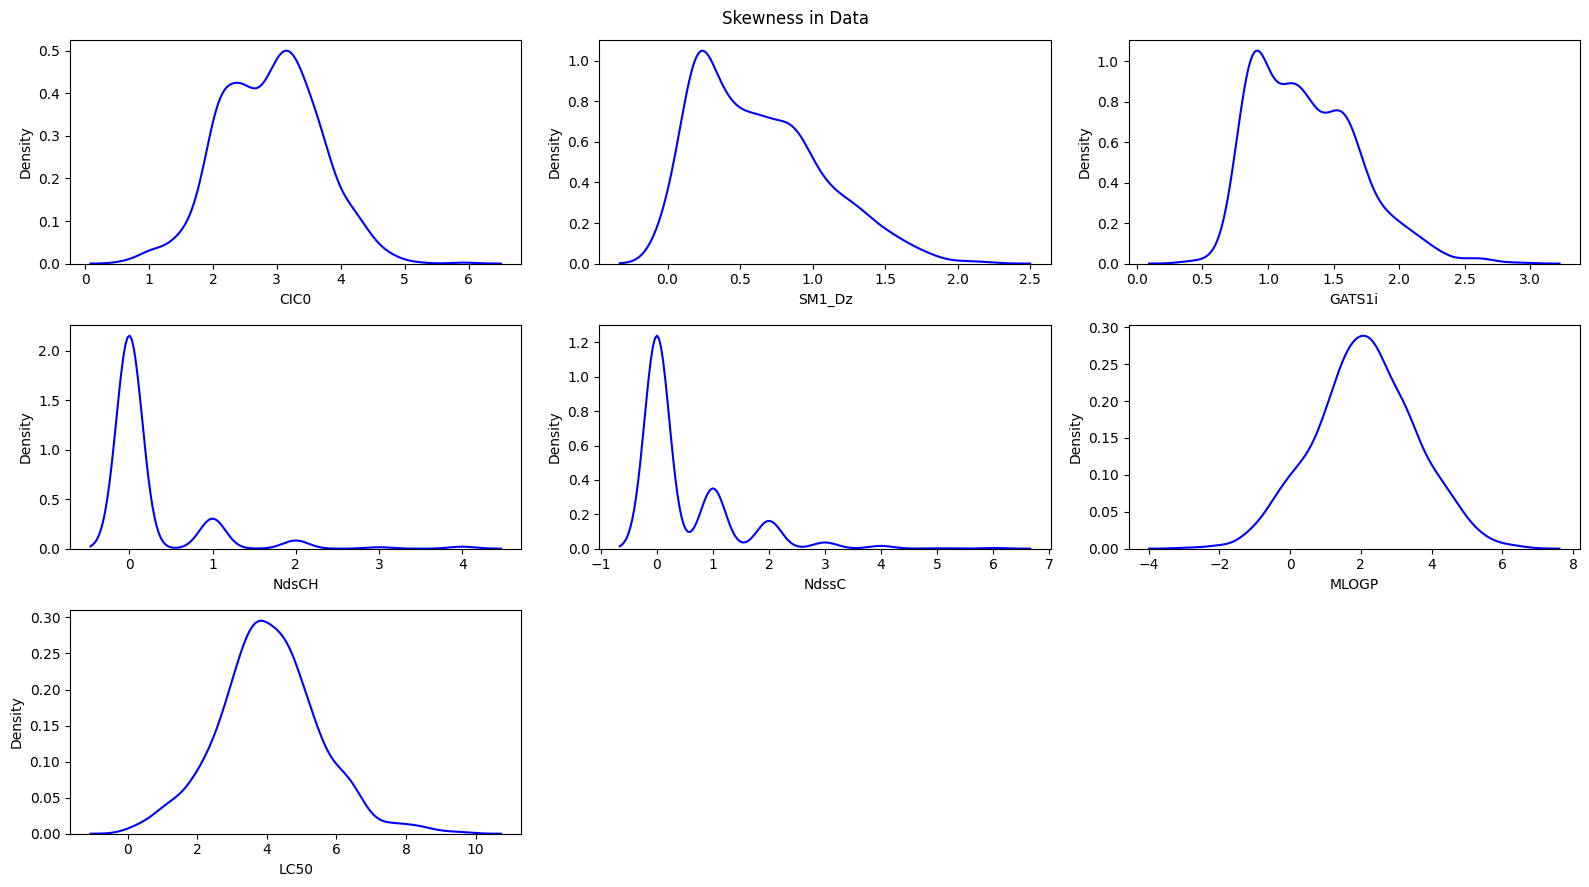

In [10]:
plt.figure(figsize=(16, 9))
plt.suptitle("Skewness in Data")  # Add a main title to the entire figure

for i in range(0, len(num_features)):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(x=df[num_features[i]], color='blue')
    plt.xlabel(num_features[i])
    plt.tight_layout()

plt.show()


CIC0 : unique identifier of each bonded Hydrogen atom.
SM1_Dz : Spectroscopic moment of order 1 using Barysz matrix.
GATS1i : 2D Geary autocorrelation descriptor.

NdssC : mostly 0 unsaturated carbons in the molecule.
NdsCH : mostly 0 Hydrogen atom bind to carbons which backs the data that most carbons are saturated.
MLOGP : most samples contain 2units of octanol i water 

Target variable:
LC50 : Although LC50 is 4units but most fishes will die if the level of toxicant increases 2units whereas minute polulation in them can survive more than 8units. 

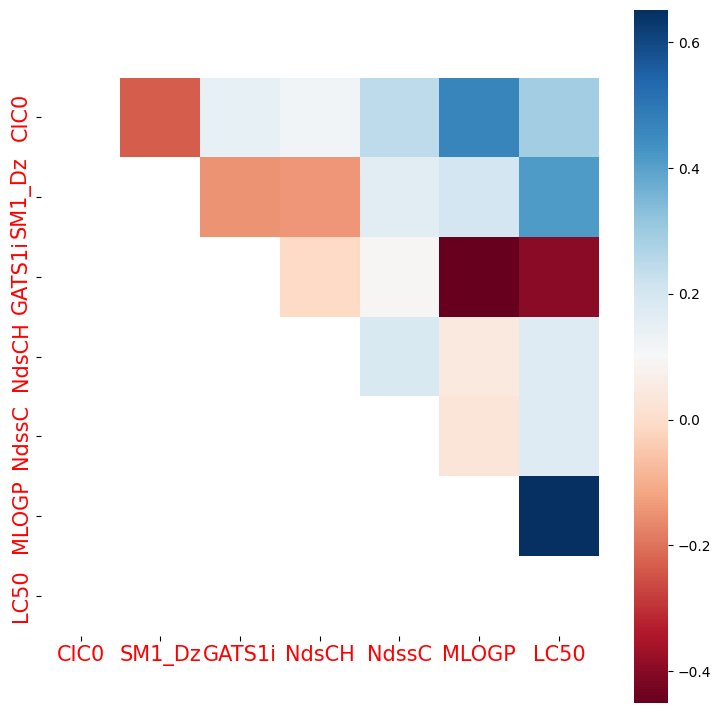

In [11]:
plt.figure(figsize = (9,9))
corr_matrix=df.corr()

matrix = np.tril(corr_matrix) # take lower correlation matrix

# Draw the heatmap with the mask
sns.heatmap(corr_matrix.T, mask=matrix, square=True, cmap = 'RdBu')
plt.xticks(size = 15,color = 'red')
plt.yticks(size = 15,  color = 'red');

MLOGP has too much corelation with LC50
GATSli is inversely propotional to LC50 awa MLOGP
NdssC&NdsCH are having +ve corelation to LC50

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=LC50),
                                                 dfLC50,
                                                 test_size=0.2,
                                                random_state=20)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline,make_pipeline

In [14]:
trf1  = ColumnTransformer([
    ('NdsCH',OneHotEncoder(sparse=False,handle_unknown='ignore'),[2,4])
],remainder='passthrough')


TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [ ]:
# train the model
from sklearn.tree import DecisionTreeRegressor

trf2 = DecisionTreeRegressor()

In [ ]:
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2)
])

In [ ]:
pipe.fit(X_train,y_train)

a:\MY_PROJECTS\Drug_EDA\env\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('NdsCH',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [2, 4])])),
                ('trf2', DecisionTreeRegressor())])

In [ ]:
pipe.named_steps

{'trf1': ColumnTransformer(remainder='passthrough',
                   transformers=[('NdsCH',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse=False),
                                  [2, 4])]),
 'trf2': DecisionTreeRegressor()}

In [ ]:
from sklearn import set_config
set_config(display='diagram')

In [ ]:
y_test.shape

(182,)

In [ ]:
y_pred = pipe.predict(X_test)
y_pred.shape

(182,)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

1.4293748926373624

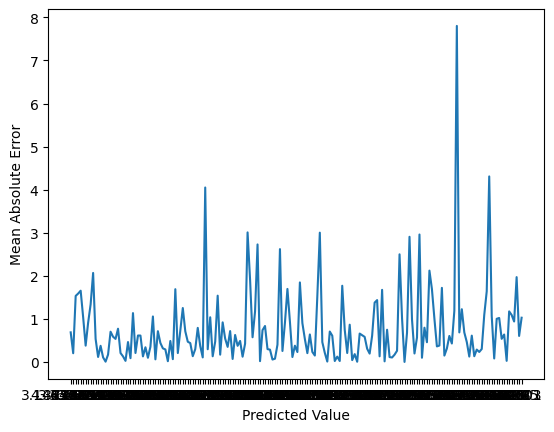

In [ ]:
# plot of the increase of mean absolute error with prediction error
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
# real value
expected = list(y_test)
# predicted value
predicted = list(y_pred)
# calculate errors
errors = list()
for i in range(len(expected)):
	# calculate error
	err = abs((expected[i] - predicted[i]))
	# store error
	errors.append(err)
	# report error
	#print('>%.1f, %.1f = %.3f' % (expected[i], predicted[i], err))
# plot errors
pyplot.plot(errors)
pyplot.xticks(ticks=[i for i in range(len(errors))], labels=predicted)
pyplot.xlabel('Predicted Value')
pyplot.ylabel('Mean Absolute Error')
pyplot.show()